In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout


In [2]:
train_path = "../input/human-activity-recognition/uci_har_dataset/UCI_HAR_Dataset/train/"
test_path = "../input/human-activity-recognition/uci_har_dataset/UCI_HAR_Dataset/test/"
features_path = "../input/human-activity-recognition/uci_har_dataset/UCI_HAR_Dataset/features.txt"

In [3]:
features = []
with open(features_path) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print("No. of unique features:{}".format(len(set(features))))

No of Features: 561
No. of unique features:477


In [4]:
#LABELS
labels = {1:'WALKING', 
          2:'WALKING_UPSTAIRS',
          3:'WALKING_DOWNSTAIRS',
          4:'SITTING',
          5:'STANDING',
          6:'LAYING'}

In [5]:
re=[]
for i , f in enumerate(features):
    for j in range(i+1 , len(features)):
        if features[i]==features[j] and features[i] not in re:
            re.append(features[i])

In [6]:
for i , f in enumerate(features):
    features[i] = ''.join(e for e in f if e not in ['(',')' , '-' , ',']) 

In [7]:
train = pd.read_csv(train_path + "X_train.txt" , delim_whitespace=True ,header=None)
train.columns = features
train['subject'] = pd.read_csv(train_path + 'subject_train.txt' , header=None , squeeze=True)
test = pd.read_csv(test_path + "X_test.txt" , delim_whitespace=True ,header=None)
test.columns = features
test['subject'] = pd.read_csv(test_path + 'subject_test.txt' , header=None , squeeze=True)

In [8]:
# obtaining the number of rows
print("number of rows in train data: ", train.shape[0])
 
# obtaining the number of columns
print("number of columns in train data : ", train.shape[1])

# obtaining the number of rows
print("number of rows in test data: ", test.shape[0])
 
# obtaining the number of columns
print("number of columns in test data : ", test.shape[1])

number of rows in train data:  7352
number of columns in train data :  562
number of rows in test data:  2947
number of columns in test data :  562


In [9]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [10]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [11]:
y_train = pd.read_csv(train_path + 'y_train.txt' , names=['Activity'] , squeeze=True)
y_test = pd.read_csv(test_path + 'y_test.txt' , names=['Activity'] , squeeze=True)

In [12]:
train['Activity']= y_train
test['Activity'] = y_test
train['ActivityName'] = y_train.map(labels)
test['ActivityName']  = y_test.map(labels)

In [13]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [14]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [15]:
X_train=train.drop(["Activity","ActivityName"],axis=1)
Y_train=train.Activity
X_test=test.drop(["Activity","ActivityName"],axis=1)
Y_test=test.Activity

**DecisionTreeClassifier**

The accuracy of Decision Tree is: 0.8486596538853071
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.82      0.91      0.86       496
           2       0.86      0.73      0.79       471
           3       0.80      0.83      0.82       420
           4       0.82      0.75      0.78       491
           5       0.78      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.84      0.84      2947
weighted avg       0.85      0.85      0.85      2947



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


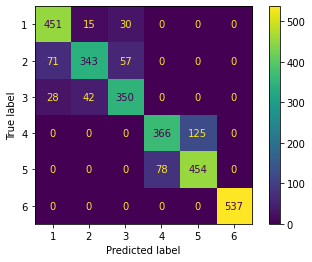

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
decisiontree=DecisionTreeClassifier(criterion='entropy')
decisiontree.fit(X_train,Y_train)
pred=decisiontree.predict(X_test)
print("The accuracy of Decision Tree is:",metrics.accuracy_score(pred,Y_test))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

plot_confusion_matrix(decisiontree, X_test, y_test)
plt.show()

**KNN**

The accuracy of KNN is: 0.8143875127248049
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.68      0.91      0.78       496
           2       0.84      0.71      0.77       471
           3       0.87      0.69      0.77       420
           4       0.82      0.69      0.75       491
           5       0.76      0.90      0.82       532
           6       1.00      0.95      0.97       537

    accuracy                           0.81      2947
   macro avg       0.83      0.81      0.81      2947
weighted avg       0.83      0.81      0.81      2947



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


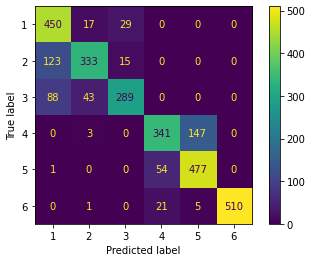

In [17]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print("The accuracy of KNN is:",metrics.accuracy_score(pred,Y_test))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

**SVC with linear kernal**

Accuracy of SVC is:  0.9633525619273838
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       491
           5       0.90      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


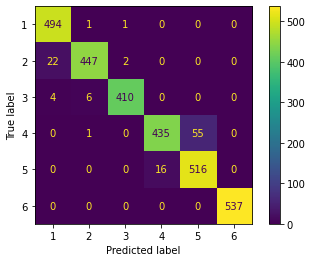

In [18]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)
pred= classifier.predict(X_test)
print("Accuracy of SVC is: ",metrics.accuracy_score(Y_test,pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

**SVC with rbf kernal**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(X_train, Y_train)
pred= classifier.predict(X_test)
print("Accuracy of SVC is: ",metrics.accuracy_score(Y_test,pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

**LOGISTIC REGRESSION**

Accuracy of LogisticRegression is:  0.9596199524940617

CLASSIFICATION REPORT

              precision    recall  f1-score   support



           1       0.94      0.99      0.97       496

           2       0.97      0.94      0.96       471

           3       0.99      0.97      0.98       420

           4       0.98      0.87      0.92       491

           5       0.89      0.98      0.93       532

           6       1.00      1.00      1.00       537



    accuracy                           0.96      2947

   macro avg       0.96      0.96      0.96      2947

weighted avg       0.96      0.96      0.96      2947




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

  warnings.warn(msg, category=FutureWarning)


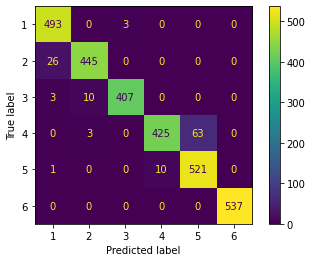

In [100]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, Y_train)
pred= model.predict(X_test)
print("Accuracy of LogisticRegression is: ",metrics.accuracy_score(Y_test,pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

 **RANDOM FOREST**

Accuracy of random Forest:  0.9596199524940617

CLASSIFICATION REPORT

              precision    recall  f1-score   support



           1       0.94      0.99      0.97       496

           2       0.97      0.94      0.96       471

           3       0.99      0.97      0.98       420

           4       0.98      0.87      0.92       491

           5       0.89      0.98      0.93       532

           6       1.00      1.00      1.00       537



    accuracy                           0.96      2947

   macro avg       0.96      0.96      0.96      2947

weighted avg       0.96      0.96      0.96      2947




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

  warnings.warn(msg, category=FutureWarning)


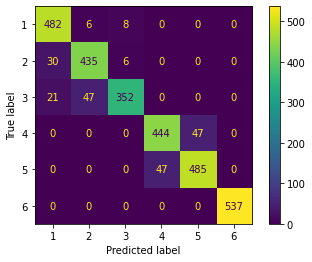

In [98]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,Y_train)
pred = model.predict(X_test) 
print("Accuracy of random Forest: ",metrics.accuracy_score(y_test, pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

**NAVIE BAYES**


Accuracy of Naive:  0.7702748557855447

CLASSIFICATION REPORT

              precision    recall  f1-score   support



           1       0.82      0.84      0.83       496

           2       0.76      0.96      0.84       471

           3       0.83      0.61      0.70       420

           4       0.58      0.73      0.65       491

           5       0.79      0.87      0.83       532

           6       0.96      0.61      0.75       537



    accuracy                           0.77      2947

   macro avg       0.79      0.77      0.77      2947

weighted avg       0.79      0.77      0.77      2947




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

  warnings.warn(msg, category=FutureWarning)


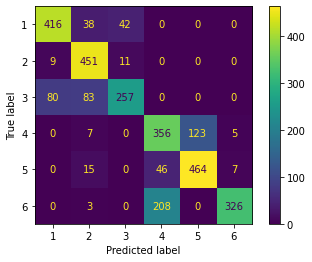

In [96]:
from sklearn.naive_bayes import GaussianNB
navie=GaussianNB(priors=None, var_smoothing=1e-09)
navie.fit(X_train,Y_train)
pred = navie.predict(X_test) 
print("Accuracy of Naive: ",metrics.accuracy_score(y_test,pred)) 
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(navie, X_test, y_test)
plt.show()

**CART**

The accuracy of CART is: 0.8615541228367831

CLASSIFICATION REPORT

              precision    recall  f1-score   support



           1       0.83      0.94      0.88       496

           2       0.84      0.77      0.81       471

           3       0.88      0.82      0.85       420

           4       0.83      0.75      0.79       491

           5       0.79      0.86      0.82       532

           6       1.00      1.00      1.00       537



    accuracy                           0.86      2947

   macro avg       0.86      0.86      0.86      2947

weighted avg       0.86      0.86      0.86      2947




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

  warnings.warn(msg, category=FutureWarning)


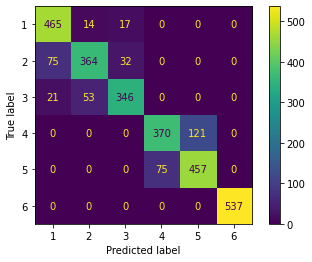

In [87]:
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier(criterion='gini')
cart.fit(X_train,Y_train)
pred=cart.predict(X_test)
print("The accuracy of CART is:",metrics.accuracy_score(pred,Y_test))
print("CLASSIFICATION REPORT")
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
plot_confusion_matrix(cart, X_test, y_test)
plt.show()
